In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)

from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10,6)

In [2]:
ls

Dataset/
Hotel Booking Prediction.ipynb
data_dictionary.txt
ml_hotel_booking_prediction_shan_singh.ipynb


In [3]:
df = pd.read_csv('Dataset/hotel_bookings.csv')

In [4]:
pd.set_option('display.max_columns',500)

In [5]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [6]:
df.isna().sum()/df.shape[0]*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [7]:
df.drop(['company','agent'],axis=1,inplace=True)

In [8]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [9]:
df.country.mode()

0    PRT
Name: country, dtype: object

In [10]:
df.country.fillna(df.country.mode()[0],inplace=True)

In [11]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
df.children.value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [13]:
df.children.fillna(df.children.mode()[0],inplace=True)

In [14]:
df[df.children==10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,0,Contract,133.16,0,1,No-Show,7/12/2015


In [15]:
df.drop(328,inplace=True)

In [16]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
data = df[~((df.children==0) & (df.adults==0) & (df.babies==0))]

In [18]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [19]:
data[data.is_canceled==0].country.value_counts()/data[data.is_canceled==0].shape[0]

country
PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: count, Length: 165, dtype: float64

In [20]:
coutry_wise_data = data[data.is_canceled==0].country.value_counts().reset_index()
coutry_wise_data.columns = ['country','no_of_guests']
coutry_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


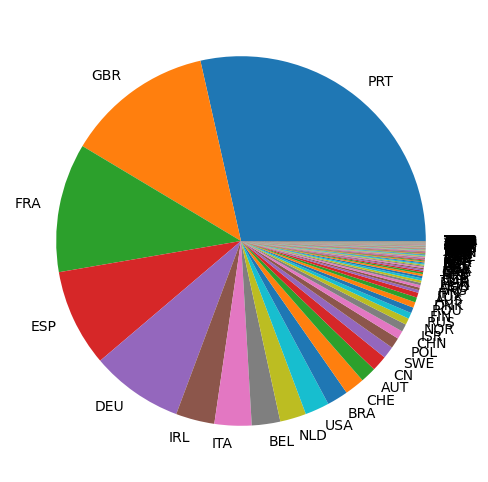

In [21]:
plt.pie(coutry_wise_data.no_of_guests,labels=coutry_wise_data.country)
plt.show()

In [22]:
map_guest = px.choropleth(data_frame=coutry_wise_data,
              locations=coutry_wise_data.country,
              color = coutry_wise_data.no_of_guests,
              hover_name=coutry_wise_data.country,
              title='Home Country of Guests'
             )

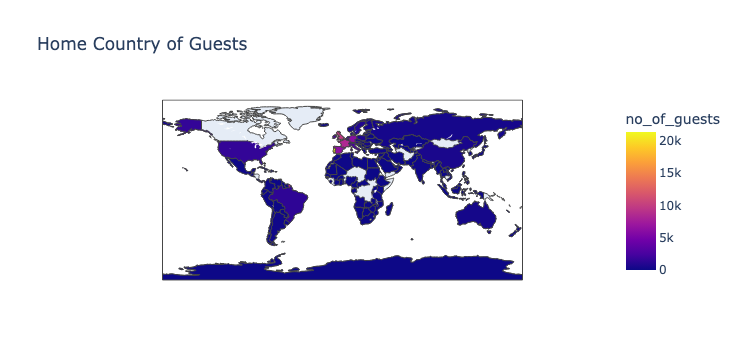

In [23]:
map_guest.show()

#### How much do guest pay for a room per night?

In [24]:
data2 = data[data.is_canceled==0]

In [25]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

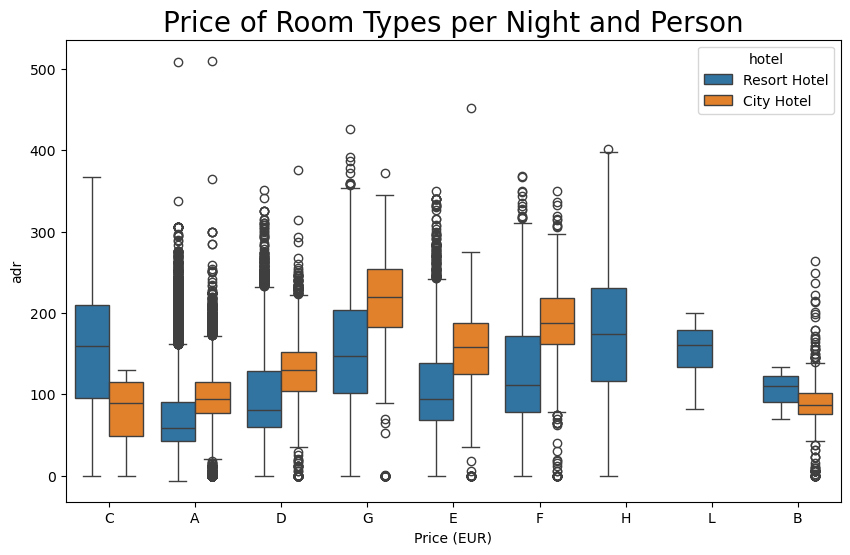

In [26]:
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=data2)
plt.title('Price of Room Types per Night and Person',fontsize=20)
plt.xlabel('Room Types')
plt.xlabel('Price (EUR)')
plt.show()

In [27]:
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


#### Which months are the most busiest?

In [28]:
data.hotel.value_counts()

hotel
City Hotel      79163
Resort Hotel    40046
Name: count, dtype: int64

In [29]:
resort = data[(data.hotel=='Resort Hotel') & (data.is_canceled==0)]
city = data[(data.hotel=='City Hotel') & (data.is_canceled==0)]

In [30]:
resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,1.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,89.75,0,0,Check-Out,9/10/2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,9/10/2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,0.0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out,9/12/2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out,9/14/2017


In [31]:
city

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [32]:
rush_resort = resort.arrival_date_month.value_counts().reset_index()
rush_resort.columns = ['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [33]:
rush_city = city.arrival_date_month.value_counts().reset_index()
rush_city.columns = ['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [34]:
final_rush = rush_resort.merge(rush_city,on='month')
final_rush.columns = ['month','no_of_guests_resort','no_of_guests_city']
final_rush

,month,no_of_guests_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [35]:
import sort_dataframeby_monthorweek as sd
import sorted_months_weekdays as sm

In [36]:
final_rush = sd.Sort_Dataframeby_Month(final_rush,'month')
final_rush

,month,no_of_guests_resort,no_of_guests_city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


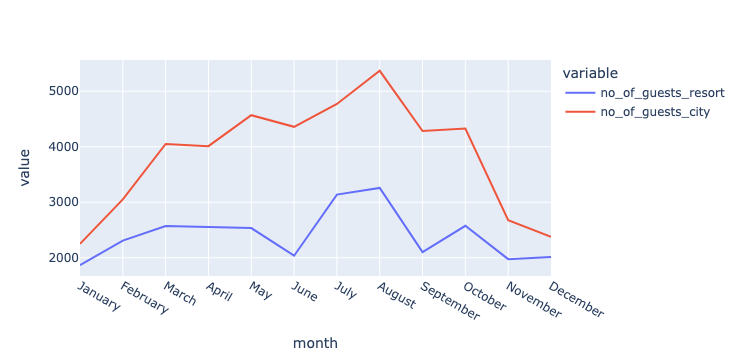

In [37]:
px.line(data_frame=final_rush, x='month',y=['no_of_guests_resort','no_of_guests_city'])

In [38]:
data = sd.Sort_Dataframeby_Month(data,'arrival_date_month')

In [39]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,2.0,0,BB,RUS,Online TA,TA/TO,0,0,0,H,H,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,89.00,0,1,No-Show,1/1/2016
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,0.0,0,HB,ARG,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,73.46,0,2,Check-Out,1/3/2016
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,0,Transient,119.00,0,0,Canceled,12/22/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119204,City Hotel,0,173,2016,December,53,26,3,8,2,1.0,0,BB,BRA,Direct,Direct,0,0,0,E,F,4,No Deposit,0,Transient,117.82,0,1,Check-Out,1/6/2017
119205,City Hotel,0,17,2016,December,53,30,2,5,2,0.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,90.34,0,1,Check-Out,1/6/2017
119206,City Hotel,0,107,2016,December,53,31,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,B,0,No Deposit,0,Transient,103.57,0,0,Check-Out,1/7/2017
119207,City Hotel,0,310,2016,December,53,27,2,10,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,0,Transient-Party,68.57,0,2,Check-Out,1/8/2017


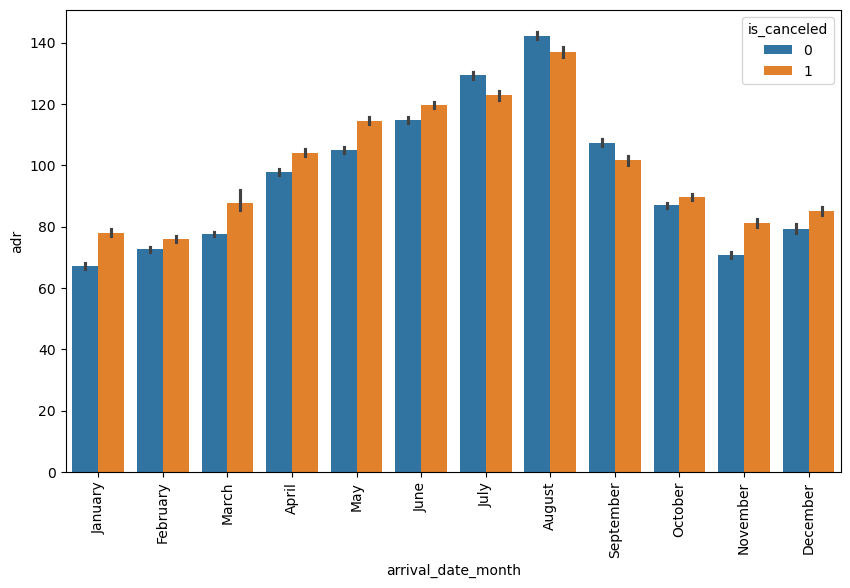

In [40]:
sns.barplot(data,x='arrival_date_month',y='adr',hue='is_canceled')
plt.xticks(rotation=90)
plt.show()

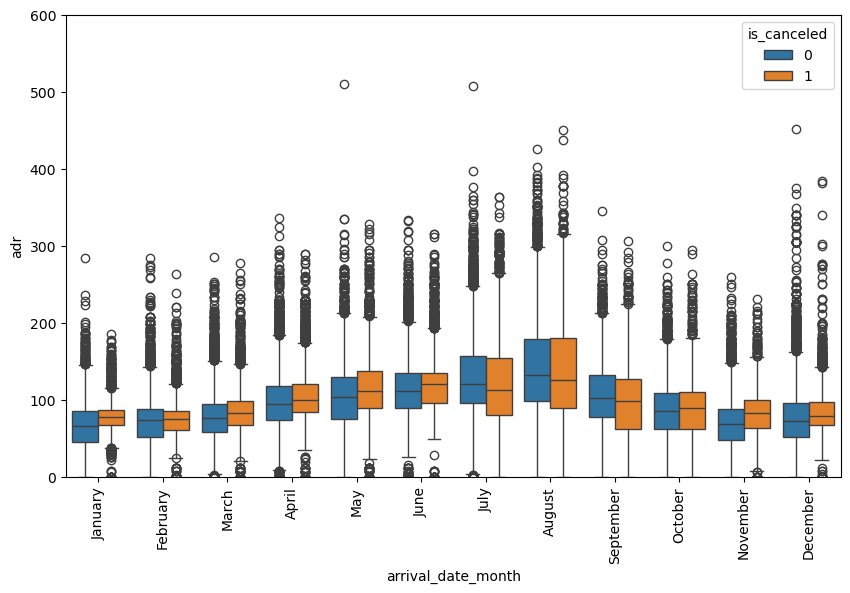

In [41]:
sns.boxplot(data,x='arrival_date_month',y='adr',hue='is_canceled')
plt.xticks(rotation=90)
plt.ylim(0,600)
plt.show()

#### Analyze whether booking were made only ofr weekdays or weekends or both?

In [42]:
pd.crosstab(index=data.stays_in_weekend_nights, columns=data.stays_in_week_nights)

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,912,38,24,11,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,34,15,7,5,9,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,2,11,11,7,71,8,3,3,35,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,1,2,5,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,3,34,11,7,0,0,0,0,0,0,0,0,0,0


In [43]:
def week_function(df):
    f1 = 'stays_in_weekend_nights'
    f2 = 'stays_in_week_nights'
    
    if df[f1]==0 and df[f2]>0:
        return 'stay_just_weekday'
    elif df[f2]==0 and df[f1]>0:
        return 'stay_just_weekend'
    elif df[f1]>0 and df[f2]>0:
        return 'stay_both_weekdays_weekends'
    else:
        return 'undefined_data'

In [44]:
data2['weekend_or_weekday'] = data2.apply(week_function,axis=1)

In [45]:
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015,stay_just_weekday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015,stay_just_weekday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015,stay_just_weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017,stay_both_weekdays_weekends
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017,stay_both_weekdays_weekends
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017,stay_both_weekdays_weekends
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017,stay_both_weekdays_weekends


In [46]:
data2.weekend_or_weekday.value_counts()

weekend_or_weekday
stay_both_weekdays_weekends    37551
stay_just_weekday              31788
stay_just_weekend               5050
undefined_data                   622
Name: count, dtype: int64

In [47]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [48]:
data2 = sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [49]:
grp_data = data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [50]:
sorted_data = sd.Sort_Dataframeby_Month(grp_data,'arrival_date_month')

In [51]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [52]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekday,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<Axes: xlabel='arrival_date_month'>

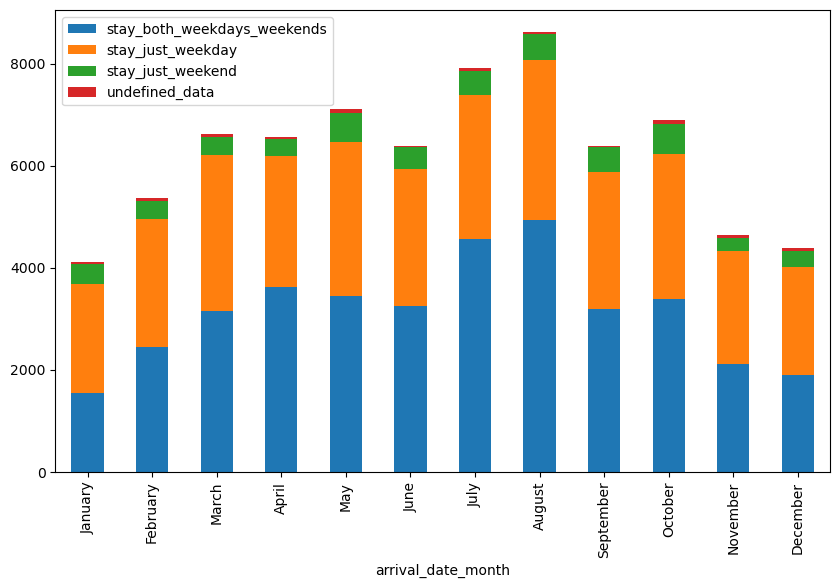

In [53]:
sorted_data.plot(kind='bar',stacked=True)

In [54]:
def family(row):
    if (row.adults>0) & (row.children>0 or row.babies>0):
        return 1
    else: 
        return 0

In [55]:
data['is_family'] = data.apply(family, axis=1)

In [56]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,2.0,0,BB,RUS,Online TA,TA/TO,0,0,0,H,H,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,89.00,0,1,No-Show,1/1/2016,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,0.0,0,HB,ARG,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,73.46,0,2,Check-Out,1/3/2016,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,0,Transient,119.00,0,0,Canceled,12/22/2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119204,City Hotel,0,173,2016,December,53,26,3,8,2,1.0,0,BB,BRA,Direct,Direct,0,0,0,E,F,4,No Deposit,0,Transient,117.82,0,1,Check-Out,1/6/2017,1
119205,City Hotel,0,17,2016,December,53,30,2,5,2,0.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,90.34,0,1,Check-Out,1/6/2017,0
119206,City Hotel,0,107,2016,December,53,31,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,B,0,No Deposit,0,Transient,103.57,0,0,Check-Out,1/7/2017,0
119207,City Hotel,0,310,2016,December,53,27,2,10,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,0,Transient-Party,68.57,0,2,Check-Out,1/8/2017,0


In [57]:
data2['total_customers'] = data2.adults + data2.children + data2.babies
data['total_customers'] = data.adults + data.children + data.babies

In [58]:
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday,total_customers
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,stay_just_weekday,2.0
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,2.0,0,BB,RUS,Online TA,TA/TO,0,0,0,H,H,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,stay_just_weekday,4.0
2,Resort Hotel,0,88,2016,January,1,1,0,2,2,0.0,0,HB,ARG,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,73.46,0,2,Check-Out,1/3/2016,stay_just_weekday,2.0
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,1.0,0,HB,ARG,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,90.17,0,2,Check-Out,1/3/2016,stay_just_weekday,3.0
4,Resort Hotel,0,110,2016,January,1,2,2,5,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,0,Transient,46.93,0,3,Check-Out,1/9/2016,stay_both_weekdays_weekends,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75006,City Hotel,0,173,2016,December,53,26,3,8,2,1.0,0,BB,BRA,Direct,Direct,0,0,0,E,F,4,No Deposit,0,Transient,117.82,0,1,Check-Out,1/6/2017,stay_both_weekdays_weekends,3.0
75007,City Hotel,0,17,2016,December,53,30,2,5,2,0.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,90.34,0,1,Check-Out,1/6/2017,stay_both_weekdays_weekends,2.0
75008,City Hotel,0,107,2016,December,53,31,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,B,0,No Deposit,0,Transient,103.57,0,0,Check-Out,1/7/2017,stay_both_weekdays_weekends,2.0
75009,City Hotel,0,310,2016,December,53,27,2,10,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,0,Transient-Party,68.57,0,2,Check-Out,1/8/2017,stay_both_weekdays_weekends,2.0


In [59]:
data2['total_nights'] = data2.stays_in_week_nights + data2.stays_in_weekend_nights
data['total_nights'] = data.stays_in_week_nights + data.stays_in_weekend_nights

In [60]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customers,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,2.0,0,BB,RUS,Online TA,TA/TO,0,0,0,H,H,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,0.0,0,HB,ARG,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,0,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119204,City Hotel,0,173,2016,December,53,26,3,8,2,1.0,0,BB,BRA,Direct,Direct,0,0,0,E,F,4,No Deposit,0,Transient,117.82,0,1,Check-Out,1/6/2017,1,3.0,11
119205,City Hotel,0,17,2016,December,53,30,2,5,2,0.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,90.34,0,1,Check-Out,1/6/2017,0,2.0,7
119206,City Hotel,0,107,2016,December,53,31,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,B,0,No Deposit,0,Transient,103.57,0,0,Check-Out,1/7/2017,0,2.0,7
119207,City Hotel,0,310,2016,December,53,27,2,10,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,0,Transient-Party,68.57,0,2,Check-Out,1/8/2017,0,2.0,12


In [61]:
data.deposit_type.unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [62]:
# If deposit type is nodeposit and refundable, it means deposit doesn't exist
dict = {'No Deposit':0, 'Non Refund':1, 'Refundable':0}

In [63]:
data['deposit_given'] = data.deposit_type.map(dict)
data2['deposit_given'] = data2.deposit_type.map(dict)

In [64]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customers,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,2.0,0,BB,RUS,Online TA,TA/TO,0,0,0,H,H,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,0.0,0,HB,ARG,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,2.0,0,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,0,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119204,City Hotel,0,173,2016,December,53,26,3,8,2,1.0,0,BB,BRA,Direct,Direct,0,0,0,E,F,4,No Deposit,0,Transient,117.82,0,1,Check-Out,1/6/2017,1,3.0,11,0
119205,City Hotel,0,17,2016,December,53,30,2,5,2,0.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,90.34,0,1,Check-Out,1/6/2017,0,2.0,7,0
119206,City Hotel,0,107,2016,December,53,31,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,B,0,No Deposit,0,Transient,103.57,0,0,Check-Out,1/7/2017,0,2.0,7,0
119207,City Hotel,0,310,2016,December,53,27,2,10,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,2,No Deposit,0,Transient-Party,68.57,0,2,Check-Out,1/8/2017,0,2.0,12,0


In [65]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customers', 'total_nights', 'deposit_given'],
      dtype='object')

In [66]:
data.drop(['adults', 'children', 'babies', 'deposit_type'],axis=1,inplace=True)
data2.drop(['adults', 'children', 'babies', 'deposit_type'],axis=1,inplace=True)

In [67]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customers',
       'total_nights', 'deposit_given'],
      dtype='object')

#### Apply Feature Encoding on Data

In [68]:
data.arrival_date_month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [69]:
dict = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
       'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

In [70]:
cate_features = [col for col in data.columns if data[col].dtype == 'O']
num_features = [col for col in data.columns if data[col].dtype != 'O']

In [71]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [72]:
d1 = data[cate_features]

In [73]:
d1.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015


In [74]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.2776556959496579}

In [75]:
d1['cancellation']=data.is_canceled

In [76]:
d1

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...
119204,City Hotel,December,BB,BRA,Direct,Direct,E,F,Transient,Check-Out,1/6/2017,0
119205,City Hotel,December,SC,FRA,Online TA,TA/TO,A,A,Transient,Check-Out,1/6/2017,0
119206,City Hotel,December,BB,FRA,Offline TA/TO,TA/TO,A,B,Transient,Check-Out,1/7/2017,0
119207,City Hotel,December,SC,DEU,Online TA,TA/TO,A,A,Transient-Party,Check-Out,1/8/2017,0


In [77]:
cols = d1.columns

In [78]:
cols = cols[0:-1]

In [79]:
for col in cols:
    dict2 = d1.groupby([col])['cancellation'].mean().to_dict()
    d1[col] = d1[col].map(dict2)

In [80]:
d1.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277656,0.305016,0.374099,0.379365,0.36759,0.410592,0.391567,0.251343,0.254504,0.0,0.048276,0
1,0.277656,0.305016,0.374099,0.379365,0.36759,0.410592,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277656,0.305016,0.374099,0.562949,0.36759,0.410592,0.318073,0.251343,0.407864,1.0,0.101010,1
3,0.277656,0.305016,0.344653,0.252336,0.36759,0.410592,0.391567,0.251343,0.407864,0.0,0.108247,0
4,0.277656,0.305016,0.374099,0.562949,0.36759,0.410592,0.364723,0.306002,0.407864,1.0,0.684211,1


In [81]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119204,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119205,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119206,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119207,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [82]:
df = pd.concat([d1,data[num_features]],axis=1)
df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
0,0.277656,0.305016,0.374099,0.379365,0.367590,0.410592,0.391567,0.251343,0.254504,0.0,0.048276,0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277656,0.305016,0.374099,0.379365,0.367590,0.410592,0.407654,0.352528,0.254504,0.0,0.048276,0,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277656,0.305016,0.374099,0.562949,0.367590,0.410592,0.318073,0.251343,0.407864,1.0,0.101010,1,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0.277656,0.305016,0.344653,0.252336,0.367590,0.410592,0.391567,0.251343,0.407864,0.0,0.108247,0,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,0.277656,0.305016,0.374099,0.562949,0.367590,0.410592,0.364723,0.306002,0.407864,1.0,0.684211,1,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119204,0.417859,0.350348,0.374099,0.373537,0.153712,0.174868,0.292683,0.247134,0.407864,0.0,0.569378,0,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119205,0.417859,0.350348,0.374064,0.185848,0.367590,0.410592,0.391567,0.445055,0.407864,0.0,0.569378,0,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119206,0.417859,0.350348,0.374099,0.185848,0.343286,0.410592,0.391567,0.237233,0.407864,0.0,0.394737,0,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119207,0.417859,0.350348,0.374064,0.167193,0.367590,0.410592,0.391567,0.445055,0.254504,0.0,0.303704,0,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [83]:
df.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customers', 'total_nights', 'deposit_given'],
      dtype='object')

In [84]:
df.drop(['cancellation'],axis=1,inplace=True)

In [85]:
df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
0,0.277656,0.305016,0.374099,0.379365,0.367590,0.410592,0.391567,0.251343,0.254504,0.0,0.048276,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277656,0.305016,0.374099,0.379365,0.367590,0.410592,0.407654,0.352528,0.254504,0.0,0.048276,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277656,0.305016,0.374099,0.562949,0.367590,0.410592,0.318073,0.251343,0.407864,1.0,0.101010,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0.277656,0.305016,0.344653,0.252336,0.367590,0.410592,0.391567,0.251343,0.407864,0.0,0.108247,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,0.277656,0.305016,0.374099,0.562949,0.367590,0.410592,0.364723,0.306002,0.407864,1.0,0.684211,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119204,0.417859,0.350348,0.374099,0.373537,0.153712,0.174868,0.292683,0.247134,0.407864,0.0,0.569378,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119205,0.417859,0.350348,0.374064,0.185848,0.367590,0.410592,0.391567,0.445055,0.407864,0.0,0.569378,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119206,0.417859,0.350348,0.374099,0.185848,0.343286,0.410592,0.391567,0.237233,0.407864,0.0,0.394737,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119207,0.417859,0.350348,0.374064,0.167193,0.367590,0.410592,0.391567,0.445055,0.254504,0.0,0.303704,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


#### Handle Outliers

<Axes: xlabel='lead_time', ylabel='Density'>

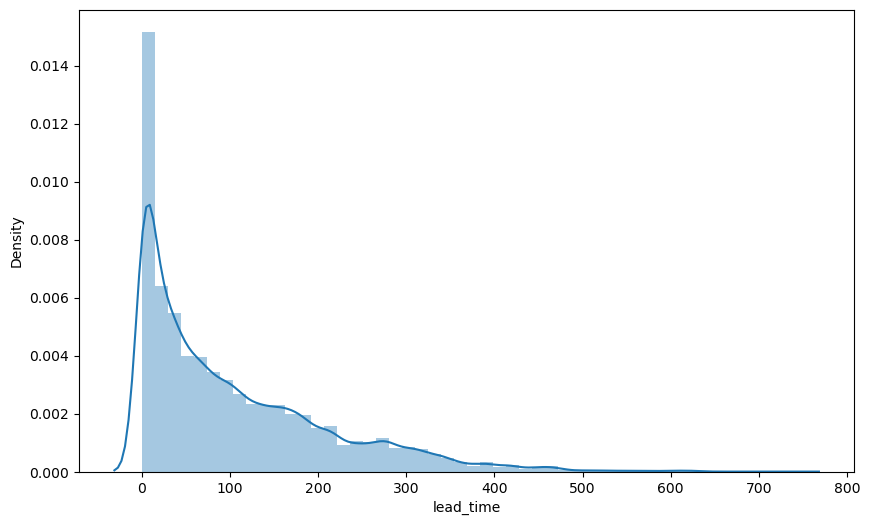

In [86]:
sns.distplot(df.lead_time)

In [87]:
def handle_outlier(col):
    df[col] = np.log1p(df[col])

In [88]:
handle_outlier('lead_time')

In [89]:
df.lead_time

0         4.700480
1         4.700480
2         1.098612
3         4.488636
4         3.044522
            ...   
119204    5.159055
119205    2.890372
119206    4.682131
119207    5.739793
119208    5.739793
Name: lead_time, Length: 119209, dtype: float64

<Axes: xlabel='lead_time', ylabel='Density'>

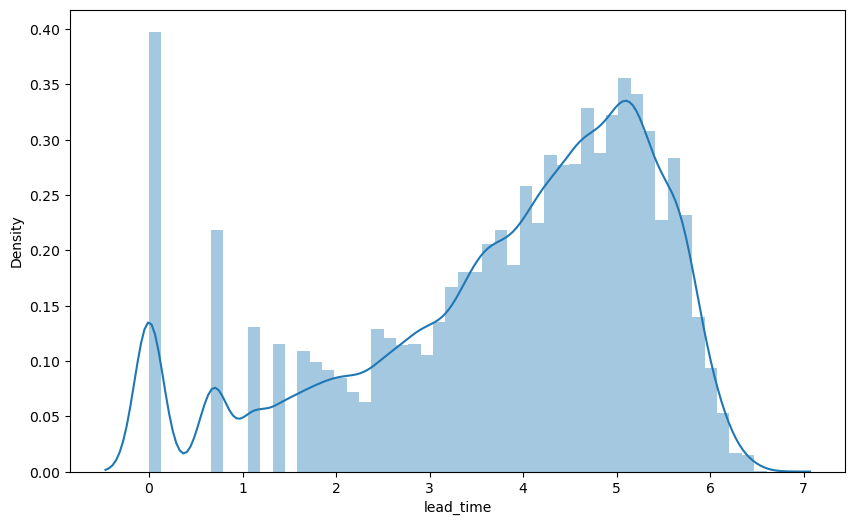

In [90]:
sns.distplot(df.lead_time)

In [91]:
## adr = average daily rate

<Axes: xlabel='adr', ylabel='Density'>

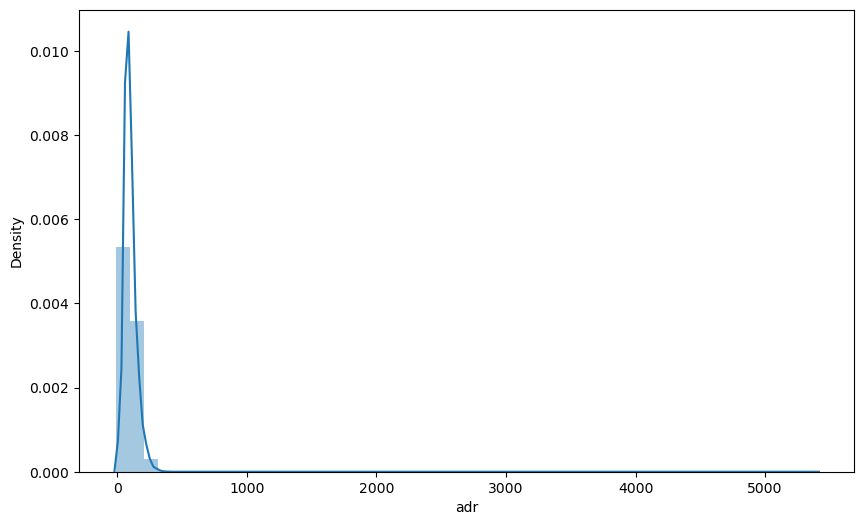

In [92]:
sns.distplot(df.adr)

In [93]:
df[df.adr<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
14989,0.277656,0.322277,0.374099,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,0.328767,0,5.278115,2017,10,5,4,6,1,0,2,2,0,-6.38,0,0,0,2.0,10,0


In [94]:
handle_outlier('adr')

In [95]:
df.adr.isna().sum()

1

<Axes: xlabel='adr', ylabel='Density'>

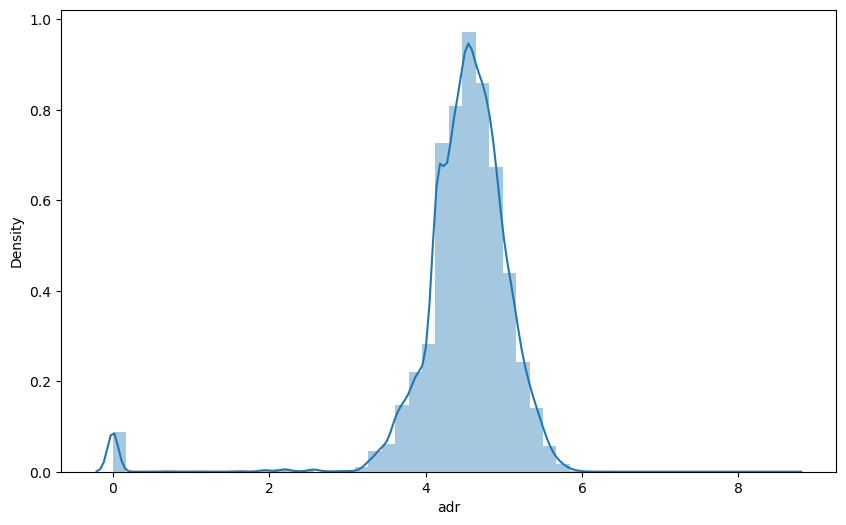

In [96]:
sns.distplot(df.adr.dropna())

#### Select important features usiong Co-relation and univariate analysis

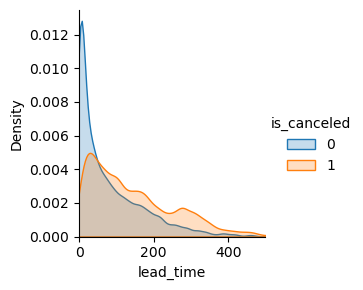

In [97]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [98]:
corr = df.corr()
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
hotel,1.000000,0.051208,0.061781,-0.040596,0.102587,0.182273,0.198126,0.280861,-0.008369,0.137100,0.107501,0.137100,0.109871,0.035157,0.001243,-0.001683,-0.187789,-0.235926,-0.052529,-0.012262,-0.004468,-0.076568,0.072724,0.154050,-0.218966,-0.043472,-0.058057,-0.038629,-0.249718,0.172412
arrival_date_month,0.051208,1.000000,-0.010207,-0.052401,0.047909,0.077065,-0.038784,0.015468,-0.029669,0.069885,-0.089501,0.069885,0.241370,0.015501,0.155634,0.002243,0.046587,0.036656,-0.057684,0.008795,-0.021970,-0.011052,0.029183,0.228129,-0.021914,0.002742,0.020456,0.079097,0.045618,0.057395
meal,0.061781,-0.010207,1.000000,0.022467,-0.025993,-0.025476,0.010045,0.013926,0.105761,0.050583,0.038290,0.050583,-0.040308,-0.024563,0.015309,-0.005738,-0.040112,-0.053542,0.009820,0.103612,0.011105,-0.027190,-0.031563,-0.019901,0.003451,0.006876,0.001459,-0.003464,-0.055691,0.047590
country,-0.040596,-0.052401,0.022467,1.000000,0.078979,-0.129779,0.153208,0.125432,-0.029302,0.357224,0.340381,0.357224,-0.071921,-0.180671,0.017320,0.001902,-0.146501,-0.138514,0.153307,0.093267,0.091796,-0.061541,0.067055,-0.160526,0.007615,-0.200828,-0.044173,-0.117577,-0.160810,0.395689
market_segment,0.102587,0.047909,-0.025993,0.078979,1.000000,0.540094,0.182789,0.209260,-0.265588,0.267010,0.276506,0.267010,0.397329,-0.064491,0.009890,0.008062,0.001091,-0.006661,-0.169322,0.074708,-0.117515,-0.057570,0.096375,-0.004001,-0.145718,-0.155445,-0.104574,-0.023861,-0.004547,0.397214
distribution_channel,0.182273,0.077065,-0.025476,-0.129779,0.540094,1.000000,0.070362,0.118968,-0.023267,0.177164,0.081436,0.177164,0.332215,0.013930,0.010939,-0.003947,0.079211,0.072269,-0.206694,-0.003868,-0.142649,-0.118476,0.048002,0.126514,-0.146561,0.075045,-0.026293,0.087792,0.084988,0.115162
reserved_room_type,0.198126,-0.038784,0.010045,0.153208,0.182789,0.070362,1.000000,0.722739,-0.143391,0.072786,0.148826,0.072786,0.026142,-0.092532,0.010122,-0.016951,-0.146984,-0.175784,0.032509,0.049292,0.022535,-0.040090,0.068337,-0.185928,-0.093387,-0.161404,-0.133661,-0.246353,-0.188828,0.201926
assigned_room_type,0.280861,0.015468,0.013926,0.125432,0.209260,0.118968,0.722739,1.000000,-0.084031,0.201586,0.191976,0.201586,0.142175,-0.025314,0.005855,-0.011961,-0.082258,-0.095509,-0.028269,0.063309,-0.003206,-0.096246,0.067129,-0.038343,-0.131032,-0.135333,-0.179311,-0.229115,-0.103535,0.263382
customer_type,-0.008369,-0.029669,0.105761,-0.029302,-0.265588,-0.023267,-0.143391,-0.084031,1.000000,0.136629,0.055908,0.136629,-0.135893,0.204778,-0.068016,-0.002009,0.036999,0.031063,0.002738,-0.021371,0.024721,-0.095447,-0.101815,0.117598,0.061790,0.137090,0.106652,0.124515,0.037686,0.121774
reservation_status,0.137100,0.069885,0.050583,0.357224,0.267010,0.177164,0.072786,0.201586,0.136629,1.000000,0.488327,1.000000,0.320076,0.016640,0.008314,-0.005944,-0.001357,0.025501,-0.083744,0.110141,-0.057365,-0.144868,0.054303,0.081655,-0.195700,-0.234885,-0.013265,0.044711,0.018510,0.481515


In [99]:
corr.is_canceled.sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488327
deposit_given                     0.481515
country                           0.357224
lead_time                         0.320076
market_segment                    0.267010
assigned_room_type                0.201586
distribution_channel              0.177164
hotel                             0.137100
customer_type                     0.136629
previous_cancellations            0.110141
adr                               0.081655
reserved_room_type                0.072786
arrival_date_month                0.069885
days_in_waiting_list              0.054303
meal                              0.050583
total_customers                   0.044711
stays_in_week_nights              0.025501
total_nights                      0.018510
arrival_date_year                 0.016640
arrival_date_week_number          0.008314
stays_in_weekend_nights          -0.001357
arrival_dat

In [100]:
ftd = ['reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number',
       'stays_in_weekend_nights','arrival_date_day_of_month']

In [101]:
df.drop(ftd,axis=1,inplace=True)

In [102]:
df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,lead_time,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
0,0.277656,0.305016,0.374099,0.379365,0.367590,0.410592,0.391567,0.251343,0.254504,0,4.700480,1,0,0,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277656,0.305016,0.374099,0.379365,0.367590,0.410592,0.407654,0.352528,0.254504,0,4.700480,1,0,0,0,0,0,4.763028,1,1,1,4.0,1,0
2,0.277656,0.305016,0.374099,0.562949,0.367590,0.410592,0.318073,0.251343,0.407864,1,1.098612,1,0,0,0,0,0,4.499810,0,1,0,2.0,1,0
3,0.277656,0.305016,0.344653,0.252336,0.367590,0.410592,0.391567,0.251343,0.407864,0,4.488636,2,0,0,0,0,0,4.310262,0,2,0,2.0,2,0
4,0.277656,0.305016,0.374099,0.562949,0.367590,0.410592,0.364723,0.306002,0.407864,1,3.044522,2,0,0,0,0,0,4.787492,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119204,0.417859,0.350348,0.374099,0.373537,0.153712,0.174868,0.292683,0.247134,0.407864,0,5.159055,8,0,0,0,4,0,4.777610,0,1,1,3.0,11,0
119205,0.417859,0.350348,0.374064,0.185848,0.367590,0.410592,0.391567,0.445055,0.407864,0,2.890372,5,0,0,0,0,0,4.514589,0,1,0,2.0,7,0
119206,0.417859,0.350348,0.374099,0.185848,0.343286,0.410592,0.391567,0.237233,0.407864,0,4.682131,5,0,0,0,0,0,4.649857,0,0,0,2.0,7,0
119207,0.417859,0.350348,0.374064,0.167193,0.367590,0.410592,0.391567,0.445055,0.254504,0,5.739793,10,0,0,0,2,0,4.242333,0,2,0,2.0,12,0


#### Find important features for model building

In [103]:
df.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,lead_time,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customers,total_nights,deposit_given
0,0.277656,0.305016,0.374099,0.379365,0.36759,0.410592,0.391567,0.251343,0.254504,0,4.70048,1,0,0,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277656,0.305016,0.374099,0.379365,0.36759,0.410592,0.407654,0.352528,0.254504,0,4.70048,1,0,0,0,0,0,4.763028,1,1,1,4.0,1,0


In [104]:
df.dropna(inplace=True)

In [105]:
x = df.drop('is_canceled',axis=1)

In [106]:
y = df.is_canceled

In [107]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [108]:
Lasso(alpha=0.005)

Lasso(alpha=0.005)

In [109]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005))

In [110]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [111]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [112]:
cols = x.columns

In [113]:
x.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customers',
       'total_nights', 'deposit_given'],
      dtype='object')

In [114]:
selected_features = cols[feature_sel_model.get_support()]

In [115]:
selected_features

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customers', 'total_nights',
       'deposit_given'],
      dtype='object')

In [116]:
x = x[selected_features]

In [117]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119204    0
119205    0
119206    0
119207    0
119208    0
Name: is_canceled, Length: 119208, dtype: int64

### ML Model

In [118]:
from sklearn.model_selection import train_test_split as tts

In [119]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.25)

In [120]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(89406, 12) (29802, 12) (89406,) (29802,)


In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
lr = LogisticRegression()

In [123]:
lr.fit(x_train,y_train)

LogisticRegression()

In [124]:
pred = lr.predict(x_test)

In [125]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [127]:
confusion_matrix(y_test,pred)

array([[17343,  1478],
       [ 4551,  6430]])

In [128]:
accuracy_score(y_test,pred)

0.7976981410643581

In [129]:
from sklearn.model_selection import cross_val_score as cvs

In [130]:
score = cvs(lr,x,y,cv=10)

In [131]:
score

array([0.77879373, 0.78323966, 0.78365909, 0.81687778, 0.8150323 ,
       0.73836088, 0.74322624, 0.85345189, 0.83708054, 0.80394295])

In [132]:
score.mean()

0.7953665046849252

#### Apply multiple Algorithms and check the accuracy

In [133]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.tree import DecisionTreeClassifier as dt

In [134]:
models = []

models.append(('Logistic Regression',lr()))
models.append(('Naive Bayes',gnb()))
models.append(('Random Forest',rf()))
models.append(('Decision Tree',dt()))
models.append(('KNN',knnc()))

In [135]:
models

[('Logistic Regression', LogisticRegression()),
 ('Naive Bayes', GaussianNB()),
 ('Random Forest', RandomForestClassifier()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier())]

In [136]:
for name,model in models:
    print(name)
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    print(confusion_matrix(preds,y_test))
    print('\n')
    print(accuracy_score(preds,y_test))
    print('\n')


Logistic Regression
[[17343  4551]
 [ 1478  6430]]


0.7976981410643581


Naive Bayes
[[ 6962   678]
 [11859 10303]]


0.5793235353331991


Random Forest
[[17202  2721]
 [ 1619  8260]]


0.8543721897859204


Decision Tree
[[15965  2602]
 [ 2856  8379]]


0.8168579289980539


KNN
[[16808  3364]
 [ 2013  7617]]


0.8195758673914503


